In [1]:
import numpy as np
import matplotlib.pyplot as plt
from necklace_model import Necklace
from simulated_annealing import Annealer
%load_ext snakeviz

In [2]:
# Define global variables
ensemble_size = 100 # Number of parallel walkers
max_steps = 100000 # Maximum amount of steps
start_temp = 40 # Start temperature for adapted annealing 
end_temp = -100 # End temperature for adapted annealing
therm_speed = 10**-5 # Thermodynamic speed

In [4]:
nkl = Necklace(20,2)
anl = Annealer()
anl.set_model(nkl)
energiesArr,energiesVBSF,temps,degeneracies = anl.run_adapted(ensemble_size=ensemble_size,start_temp=start_temp,end_temp=end_temp,max_steps=max_steps,therm_speed=therm_speed)

/home/chris/Documents/Semester8/PhysicsOfAlgorithms/Assignments/necklace_simulation/simulated_annealing.py:154: RuntimeWarning: invalid value encountered in true_divide
  P = Q / Q.sum(axis=0)


T = 0 reached. Programm ended


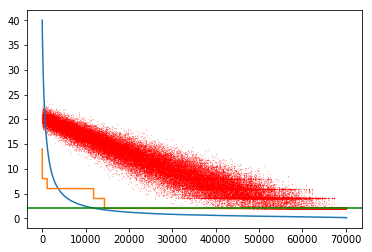

In [5]:
plt.plot(temps)
plt.scatter(np.arange(len(energiesArr)),energiesArr,s=0.01,c='r')
plt.plot(energiesVBSF)
plt.axhline(2,c='green')

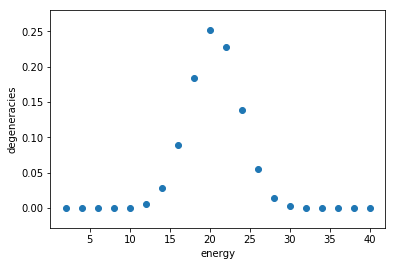

In [10]:
# Degeneracies
plt.ylabel('degeneracies')
plt.xlabel('energy')
plt.scatter(nkl.allEnergies,degeneracies)